# Dining in Osaka


## 1.Introduction (Week 1)

## 1.1 Background

Osaka is located in the southwest of Honshu Island, roughly in the center of Japan. It is the capital of Osaka Prefecture and the center of industry, commerce, and transportation in the Kansai region. Osaka is listed as one of the most representative metropolises in Japan, and it is also an internationally renowned city in the world.

Osaka has existed as a thriving and prosperous town where people gather and communicate as early as 1400 years ago. Osaka's food culture also makes this ancient city a place in the gastronomic world. Osaka is known as the "national kitchen" in Japan, it includes not only Japanese classic dishes but also cuisines from all over the world, which has fascinated countless tourists visiting Osaka.

![Osaka ramen](https://raw.githubusercontent.com/Zi-Ao-Huang/IBM_capstone_project/master/Capstone_figure/osaka_ramen.jpg)

## 1.2 Objectives

When people come to a foreign city for the first time, looking to get a real sense of a destination through its cuisine and dining culture, often the sheer volume of choice can make determining what to eat an exhausting experience.


The goal of this project is to provide a dining and restaurant guide for people who plans to travel to Osaka. In addition, this project may offer useful information for people who wants to invest or open a restaurant in Osaka. 

##2.Data section (Week 1)

### 2.1 Data features and data sources

In this project, the following data will be needed:

1.The information of wards in Osaka.

A ward is a subdivision of the cities of Japan. Osaka is a gigantic city composed of 24 wards. For example, the famous ward in Osaka, Tennōji, has the first Buddhist temple, Shitennō-Ji Temple, in Japan. In addition to the name of the wards in Osaka, we will also need the location and geographical coordinates of those wards. Luckily, this kind of information can be found easily on **Wikipedia**. We will use the BeautifulSoup library to scrap these data.

2.The restaurants' information.

With the geographical coordinates of the wards, we will be able to acquire the restaurants' information in those wads, including the latitude, longitude, name, and category of the restaurants. Those information can be obtained from **Foursquare**.

The example of data acquiring has been shown below in section 2.2. 



### 2.2 Initial data collection and preparation

Import libraries

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
import json
import random
from geopy.geocoders import Nominatim
import requests
from bs4 import BeautifulSoup 
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from folium import plugins
import os
from IPython.display import Image 
from IPython.core.display import HTML

print('Libraries imported.')

Libraries imported.


Scraping postal codes of Osaka

In [0]:
japan = requests.get('https://en.wikipedia.org/wiki/Wards_of_Japan').text
soup = BeautifulSoup(japan,'lxml')
japan_table = soup.find('table', {'class':'wikitable sortable'})
column_names = ['Wards','Kanji','City','Area']
df = pd.DataFrame(columns=column_names)
df.head()

,Wards,Kanji,City,Area


In [0]:
for tr_cell in japan_table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        df.loc[len(df)] = row_data
df=df[df['City'].isin(['Osaka'])]
print(df.shape)
df.head()

(24, 4)


,Wards,Kanji,City,Area
95,Abeno,阿倍野区,Osaka,5.98
96,Asahi,旭区,Osaka,6.32
97,Chūō,中央区,Osaka,8.87
98,Fukushima,福島区,Osaka,4.67
99,Higashinari,東成区,Osaka,4.54


Get the geographical coordinates of Wards in Osaka.

In [0]:
df["new"] = df['Wards'] + '-ku, Osaka' #Creat a new column with '-ku, Osaka' added to the ward names to increase the accuracy for coordinates results.
geolocator = Nominatim(user_agent="Osaka_explorer")
df['Major_Dist_Coord']= df['new'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord','new'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head(24)

(24, 6)


,Wards,Kanji,City,Area,Latitude,Longitude
0,Abeno,阿倍野区,Osaka,5.98,34.627501,135.514095
1,Asahi,旭区,Osaka,6.32,34.726483,135.546952
2,Chūō,中央区,Osaka,8.87,34.679846,135.510316
3,Fukushima,福島区,Osaka,4.67,34.692104,135.474812
4,Higashinari,東成区,Osaka,4.54,34.672912,135.550567
5,Higashisumiyoshi,東住吉区,Osaka,9.75,34.615662,135.531096
6,Higashiyodogawa,東淀川区,Osaka,13.27,34.740212,135.517432
7,Hirano,平野区,Osaka,15.28,34.603715,135.559027
8,Ikuno,生野区,Osaka,8.37,34.653003,135.547722
9,Joto,城東区,Osaka,8.38,34.693887,135.547769


In [0]:
# save the DataFrame as CSV file
df.to_csv("osaka_df.csv", index=False)

In [0]:
osaka_df = pd.read_csv("osaka_df.csv")
osaka_df.drop(columns=["City"],inplace=True)
osaka_df.head()

,Wards,Kanji,Area,Latitude,Longitude
0,Abeno,阿倍野区,5.98,34.627501,135.514095
1,Asahi,旭区,6.32,34.726483,135.546952
2,Chūō,中央区,8.87,34.679846,135.510316
3,Fukushima,福島区,4.67,34.692104,135.474812
4,Higashinari,東成区,4.54,34.672912,135.550567


Create a map of Osaka with wards superimposed on top

In [0]:
address = 'Chūōku, Osaka'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
lat_chuoku = location.latitude
lon_chuoku = location.longitude

In [0]:
map_osaka = folium.Map(location=[lat_chuoku, lon_chuoku], zoom_start=12) #using the coordinates of Chūōku to create the map, providing the best view of Osaka

mark_ward = folium.map.FeatureGroup()
for lat, lng, label in zip(osaka_df['Latitude'],osaka_df['Longitude'],osaka_df['Wards']):
    mark_ward.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='white',
        fill_color='#3183cc',
        fill_opacity=0.3
        )
    )


map_osaka.add_child(mark_ward)

![Osaka](https://raw.githubusercontent.com/Zi-Ao-Huang/IBM_capstone_project/master/Capstone_figure/map_osaka.jpg)

Define Foursquare Credentials and Version

In [0]:
CLIENT_ID = 'LCB1PXFFN0RYEONQAASUFW1RS0VWXQJEQM5JJCKT15VMJVPC'
CLIENT_SECRET = 'OLNEHS3UZSZJVM43F4FBH3BLA4T0VDLPFNY1RAY5TDUD4ZKV'
VERSION = '20200504'
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

Create a function to get the nearby venues for all wards in Osaka

In [0]:
def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward', 
                  'Ward_Latitude', 
                  'Ward_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [0]:
Osaka_venues = getNearbyVenues(names=osaka_df['Wards'],
                               latitudes=osaka_df['Latitude'],
                               longitudes=osaka_df['Longitude']
                               )

Abeno
Asahi
Chūō
Fukushima
Higashinari
Higashisumiyoshi
Higashiyodogawa
Hirano
Ikuno
Joto
Kita
Konohana
Minato
Miyakojima
Naniwa
Nishi
Nishinari
Nishiyodogawa
Suminoe
Sumiyoshi
Taishō
Tennōji
Tsurumi
Yodogawa


In [0]:
print(Osaka_venues.shape)
Osaka_venues.head()

(2248, 7)


,Ward,Ward_Latitude,Ward_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Abeno,34.627501,135.514095,Usagi to Boku (うさぎとぼく),34.629734,135.515104,Coffee Shop
1,Abeno,34.627501,135.514095,桃ヶ池公園,34.631239,135.521659,Park
2,Abeno,34.627501,135.514095,スタンドアサヒ,34.625118,135.520530,Sake Bar
3,Abeno,34.627501,135.514095,Gogh (石窯パンの店 ゴッホ),34.621037,135.522307,Bakery
4,Abeno,34.627501,135.514095,ライフ セントラルスクエア 北畠店,34.626273,135.509131,Supermarket


### 2.3 Initial data analysis

Create a data frame with **Restaurant**.

In [0]:
Osaka_restaurant = Osaka_venues[Osaka_venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True)
Osaka_restaurant.index = np.arange(1, len(Osaka_restaurant)+1)
Osaka_restaurant.reset_index(drop=True, inplace=True)
print(Osaka_restaurant.shape)
Osaka_restaurant.head()

(656, 7)


,Ward,Ward_Latitude,Ward_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Abeno,34.627501,135.514095,ハンバーグレストラン BOSTON 昭和町本店,34.632831,135.516725,American Restaurant
1,Abeno,34.627501,135.514095,Genji,34.623867,135.494649,Restaurant
2,Abeno,34.627501,135.514095,Men to Kokoro 7 (麺と心 7),34.639715,135.511143,Ramen Restaurant
3,Abeno,34.627501,135.514095,Royal Host (ロイヤルホスト 文の里店),34.637175,135.517652,Restaurant
4,Abeno,34.627501,135.514095,甘辛や,34.638189,135.522473,Okonomiyaki Restaurant


Investigate the restaurant categories.

In [0]:
print('There are {} unique categories.'.format(len(Osaka_restaurant['Venue_Category'].unique())))
print (Osaka_restaurant['Venue_Category'].value_counts())

There are 43 unique categories.
Ramen Restaurant                 115
Japanese Restaurant               63
Chinese Restaurant                61
Japanese Curry Restaurant         46
Sushi Restaurant                  42
Udon Restaurant                   38
Fast Food Restaurant              35
Restaurant                        28
Italian Restaurant                24
Donburi Restaurant                23
Okonomiyaki Restaurant            21
Kushikatsu Restaurant             16
Yoshoku Restaurant                13
Indian Restaurant                 12
American Restaurant               11
Soba Restaurant                   10
Asian Restaurant                   8
Tempura Restaurant                 7
Sri Lankan Restaurant              7
Dim Sum Restaurant                 7
Seafood Restaurant                 7
Dumpling Restaurant                6
Nabe Restaurant                    6
Tonkatsu Restaurant                5
Yakitori Restaurant                5
Korean Restaurant                  4
Unagi 

In [0]:
print (Osaka_restaurant['Ward'].value_counts())

Yodogawa            44
Fukushima           41
Miyakojima          39
Chūō                38
Higashiyodogawa     38
Nishi               36
Kita                35
Higashinari         33
Nishinari           31
Naniwa              31
Tennōji             31
Joto                30
Ikuno               27
Tsurumi             24
Asahi               23
Hirano              23
Abeno               22
Higashisumiyoshi    20
Minato              19
Sumiyoshi           19
Nishiyodogawa       16
Suminoe             15
Taishō              12
Konohana             9
Name: Ward, dtype: int64


Analyze the restaurant categories in Osaka

In [0]:
# one hot encoding
osaka_onehot = pd.get_dummies(Osaka_restaurant[['Venue_Category']], prefix="", prefix_sep="")
osaka_onehot['Ward'] = Osaka_restaurant['Ward'] 
ward = osaka_onehot['Ward']
osaka_onehot.drop(labels=['Ward'], axis=1,inplace = True)
osaka_onehot.insert(0, 'Ward', ward)
restaurant_counts = osaka_onehot.groupby('Ward').sum()
restaurant_counts.head()

,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Korean Restaurant,Kushikatsu Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Tempura Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
Ward,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abeno,1,1,0,1,0,1,1,2,0,0,0,1,1,1,3,0,0,0,0,0,0,0,1,3,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
Asahi,0,0,0,7,0,1,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0
Chūō,2,1,0,1,0,0,0,0,0,1,0,1,2,11,2,0,0,0,0,1,1,0,1,6,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,2
Fukushima,0,1,0,3,0,0,0,0,0,0,0,1,2,4,4,0,1,0,1,0,0,1,1,12,1,1,0,1,0,1,1,1,0,1,0,0,0,2,0,0,0,1,0
Higashinari,1,0,0,4,0,1,0,2,0,0,0,0,1,2,3,0,0,0,0,0,0,0,1,9,1,1,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,1


In [0]:
restaurant_counts_described = restaurant_counts.describe().transpose()
restaurant_top6 = restaurant_counts_described.sort_values('mean', ascending=False)[0:6]
restaurant_top6

,count,mean,std,min,25%,50%,75%,max
Ramen Restaurant,24.0,4.791667,3.463840,0.0,2.75,4.0,5.25,15.0
Japanese Restaurant,24.0,2.625000,1.739878,0.0,1.00,2.0,4.00,7.0
Chinese Restaurant,24.0,2.541667,1.793204,0.0,1.00,2.0,4.00,7.0
Japanese Curry Restaurant,24.0,1.916667,2.320357,0.0,0.00,2.0,2.25,11.0
Sushi Restaurant,24.0,1.750000,1.188715,0.0,1.00,2.0,2.25,4.0
Udon Restaurant,24.0,1.583333,1.212854,0.0,1.00,1.0,3.00,4.0


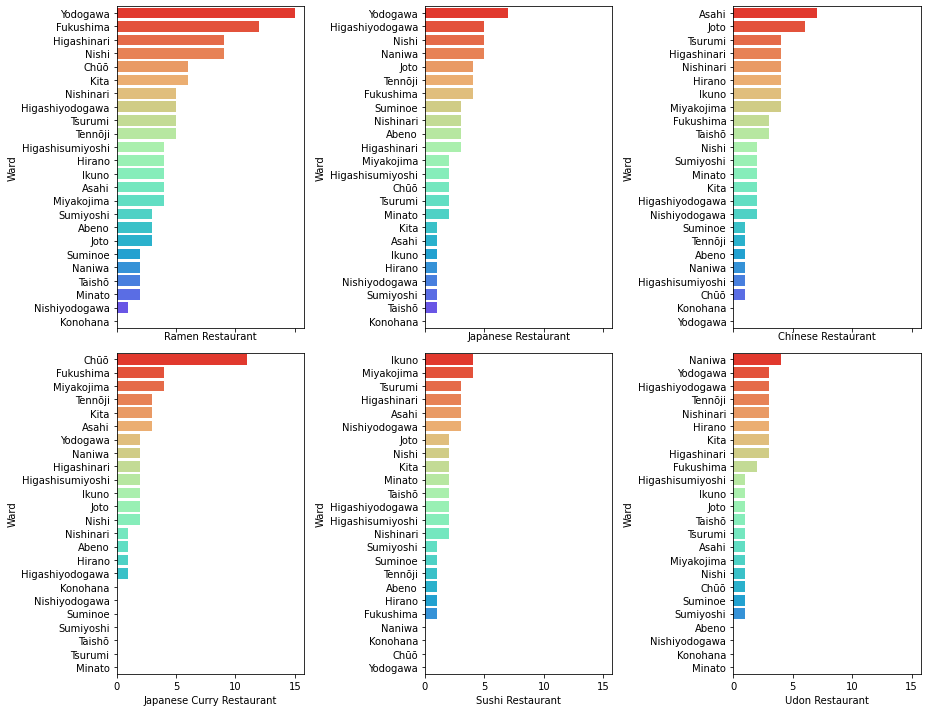

In [0]:
restaurant_top6_list = restaurant_top6.index.values.tolist()

fig, axes =plt.subplots(2, 3, figsize=(13,10), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, restaurant_top6_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:24]
    pal = sns.color_palette("rainbow", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show()

Investigate the 5 most common restaurant categories in each Ward

In [0]:
restaurant_grouped = osaka_onehot.groupby('Ward').mean().reset_index()
restaurant_grouped.head()

,Ward,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Korean Restaurant,Kushikatsu Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Tempura Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno,0.045455,0.045455,0.0,0.045455,0.0,0.045455,0.045455,0.090909,0.0,0.000000,0.0,0.045455,0.045455,0.045455,0.136364,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.00000,0.045455,0.136364,0.090909,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.045455,0.000000,0.045455,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.045455,0.000000
1,Asahi,0.000000,0.000000,0.0,0.304348,0.0,0.043478,0.000000,0.043478,0.0,0.000000,0.0,0.000000,0.043478,0.130435,0.043478,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.173913,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.130435,0.000000,0.000000,0.0,0.0,0.0,0.043478,0.043478,0.000000,0.0,0.000000,0.000000
2,Chūō,0.052632,0.026316,0.0,0.026316,0.0,0.000000,0.000000,0.000000,0.0,0.026316,0.0,0.026316,0.052632,0.289474,0.052632,0.0,0.00000,0.0,0.00000,0.026316,0.026316,0.00000,0.026316,0.157895,0.026316,0.000000,0.026316,0.026316,0.0,0.00000,0.00000,0.000000,0.026316,0.000000,0.0,0.0,0.0,0.026316,0.000000,0.026316,0.0,0.000000,0.052632
3,Fukushima,0.000000,0.024390,0.0,0.073171,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.024390,0.048780,0.097561,0.097561,0.0,0.02439,0.0,0.02439,0.000000,0.000000,0.02439,0.024390,0.292683,0.024390,0.024390,0.000000,0.024390,0.0,0.02439,0.02439,0.024390,0.000000,0.024390,0.0,0.0,0.0,0.048780,0.000000,0.000000,0.0,0.024390,0.000000
4,Higashinari,0.030303,0.000000,0.0,0.121212,0.0,0.030303,0.000000,0.060606,0.0,0.000000,0.0,0.000000,0.030303,0.060606,0.090909,0.0,0.00000,0.0,0.00000,0.000000,0.000000,0.00000,0.030303,0.272727,0.030303,0.030303,0.000000,0.000000,0.0,0.00000,0.00000,0.090909,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.000000,0.000000,0.0,0.000000,0.030303


In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Ward']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common'.format(ind+1))
ward_restaurant_sorted = pd.DataFrame(columns=columns)
ward_restaurant_sorted['Ward'] = restaurant_grouped['Ward']

for ind in np.arange(restaurant_grouped.shape[0]):
    ward_restaurant_sorted.iloc[ind, 1:] = return_most_common_venues(restaurant_grouped.iloc[ind, :], num_top_venues)

ward_restaurant_sorted.head(24)

,Ward,1st Most Common,2nd Most Common,3rd Most Common,4th Most Common,5th Most Common
0,Abeno,Ramen Restaurant,Japanese Restaurant,Fast Food Restaurant,Restaurant,Tempura Restaurant
1,Asahi,Chinese Restaurant,Ramen Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Unagi Restaurant
2,Chūō,Japanese Curry Restaurant,Ramen Restaurant,Yoshoku Restaurant,Italian Restaurant,Japanese Restaurant
3,Fukushima,Ramen Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Chinese Restaurant,Italian Restaurant
4,Higashinari,Ramen Restaurant,Chinese Restaurant,Udon Restaurant,Japanese Restaurant,Sushi Restaurant
5,Higashisumiyoshi,Ramen Restaurant,Donburi Restaurant,Sushi Restaurant,Fast Food Restaurant,Japanese Restaurant
6,Higashiyodogawa,Japanese Restaurant,Ramen Restaurant,Soba Restaurant,Udon Restaurant,Dim Sum Restaurant
7,Hirano,Chinese Restaurant,Ramen Restaurant,Udon Restaurant,Donburi Restaurant,Fast Food Restaurant
8,Ikuno,Chinese Restaurant,Ramen Restaurant,Sushi Restaurant,Donburi Restaurant,Italian Restaurant
9,Joto,Chinese Restaurant,Japanese Restaurant,Restaurant,Ramen Restaurant,Tonkatsu Restaurant


Investigate the 5 most common venues in each Ward

In [0]:
osaka_onehot = pd.get_dummies(Osaka_venues[['Venue_Category']], prefix="", prefix_sep="")
osaka_onehot['Ward'] = Osaka_venues['Ward'] 
ward = osaka_onehot['Ward']
osaka_onehot.drop(labels=['Ward'], axis=1,inplace = True)
osaka_onehot.insert(0, 'Ward', ward)
venue_counts = osaka_onehot.groupby('Ward').sum()
venue_counts.head()

,ATM,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bath House,Bed & Breakfast,Beer Bar,Bike Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Campground,Canal Lock,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Creperie,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donburi Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fishing Store,Food Court,Football Stadium,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,Gift Shop,Golf Driving Range,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,Hobby Shop,Home Service,Hostel,Hot Spring,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kaiseki Restaurant,Karaoke Box,Kids Store,Korean Restaurant,Kushikatsu Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nabe Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Organic Grocery,Other Nightlife,Outlet Mall,Pachinko Parlor,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rest Area,Restaurant,River,Rock Club,Sake Bar,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shrine,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,South Indian Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Takoyaki Place,Tapas Restaurant,Tea Room,Tempura Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tonkatsu Restaurant,Toy / Game Store,Track Stadium,Train Station,Tunnel,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo
Ward,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abeno,0,1,1,0,0,0,1,0,0,1,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,3,0,0,0,24,0,0,0,1,0,0,2,1,1,0,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,5,0,0,0,1,0,2,0,0,0,0,2,0,3,0,0,0,0,2,0,0,2,0,0,0,0,0,0,2,1,0,0,0,0,5,0,0,0,0,0,1,0,0,0,1,1,1,3,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
Asahi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0,2,0,0,0,0,0,46,0,0,0,1,0,0,4,1,0,2,0,1,0,0,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Chūō,0,2,0,0,0,0,1,0,1,4,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,2,0,0,0,4,0,0,0,0,1,0,0,1,1,8,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [0]:
venue_grouped = osaka_onehot.groupby('Ward').mean().reset_index()
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Ward']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common'.format(ind+1))
ward_venue_sorted = pd.DataFrame(columns=columns)
ward_venue_sorted['Ward'] = venue_grouped['Ward']

for ind in np.arange(venue_grouped.shape[0]):
    ward_venue_sorted.iloc[ind, 1:] = return_most_common_venues(venue_grouped.iloc[ind, :], num_top_venues)

ward_venue_sorted.head(24)

,Ward,1st Most Common,2nd Most Common,3rd Most Common,4th Most Common,5th Most Common
0,Abeno,Convenience Store,Soccer Stadium,Park,Café,Coffee Shop
1,Asahi,Convenience Store,Chinese Restaurant,Discount Store,Ramen Restaurant,Train Station
2,Chūō,Japanese Curry Restaurant,Coffee Shop,Ramen Restaurant,Hotel,Café
3,Fukushima,Ramen Restaurant,Café,Hotel,Japanese Curry Restaurant,Japanese Restaurant
4,Higashinari,Convenience Store,Ramen Restaurant,Supermarket,Chinese Restaurant,Shopping Mall
5,Higashisumiyoshi,Convenience Store,Soccer Stadium,Ramen Restaurant,Park,Donburi Restaurant
6,Higashiyodogawa,Convenience Store,Train Station,Coffee Shop,Japanese Restaurant,Ramen Restaurant
7,Hirano,Convenience Store,Ramen Restaurant,Chinese Restaurant,Donburi Restaurant,Udon Restaurant
8,Ikuno,Convenience Store,Sushi Restaurant,Pizza Place,Ramen Restaurant,Chinese Restaurant
9,Joto,Convenience Store,Sake Bar,Coffee Shop,Chinese Restaurant,BBQ Joint


## **Next week, we will continue to explore Osaka with machine learning methods.**

![Osaka](https://raw.githubusercontent.com/Zi-Ao-Huang/IBM_capstone_project/master/Capstone_figure/osaka_landscape.JPG)